#Model Evaluation & Hyperparameter Tuning
<h2> Demo 1: Perform K-Fold Cross Validation Using Python </h2>

In this demo, you will learn how to apply K-Fold cross validation to evaluate the model using Python.

## Problem Statement

Details of clients of a wholesale distributor is given along with their region the aim is to classify their region.

# Dataset

<b>Wholesale customer data.csv</b> is the dataset that has details of clients of a wholesale distributor. Annual spending on monetary units (m.u.) on diverse product categories is given along with their region:

- __Fresh__: annual spending (m.u.) on fresh products
- __Milk__: annual spending (m.u.) on milk products 
- __Grocery__: annual spending (m.u.)on grocery products
- __Frozen__: annual spending (m.u.)on frozen products
- __Detergents_Paper__: annual spending (m.u.) on detergents and paper products
- __Deliacatessen__: annual spending (m.u.)on and delicatessen products
- __Channel__: Customer Channel - `Horeca (Hotel/Restaurant/Cafe) or Retail channel`
- __Region__: Customer Region - `Lisnon, Oporto or Other`

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

# Data Analysis

<div style="background-color:##EDF9FF">
  <ul><li><h3> Checking Data</h3></li></ul>
</div>

In [4]:
data=pd.read_csv('Wholesale_customers_data_3iqv5.csv')

In [5]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
data.shape

(440, 8)

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has 440 rows and 8 columns </span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Testing For Null Values</h3></li></ul>
</div>

In [11]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})

,Count,Percentage
Channel,0,0.0
Region,0,0.0
Fresh,0,0.0
Milk,0,0.0
Grocery,0,0.0
Frozen,0,0.0
Detergents_Paper,0,0.0
Delicassen,0,0.0


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has no null values.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [15]:
target_ratio=pd.DataFrame({'Counts':data.Region.value_counts(),'Percentage':data.Region.value_counts()/len(data)})
target_ratio

,Counts,Percentage
Region,,
3,316,0.718182
1,77,0.175000
2,47,0.106818


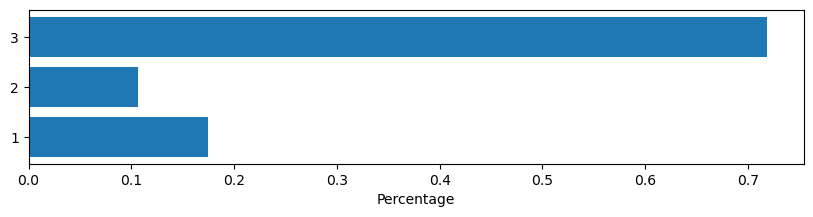

In [17]:
plt.figure(figsize = (10,2))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

<div style="background-color:##EDF9FF">
  <ul><li><h3>Handling Catergorical Features</h3></li></ul>
</div>

In [20]:
data=pd.get_dummies(data,columns=['Channel'])

<div style="background-color:##EDF9FF">
  <ul><li><h3>Scaling Features</h3></li></ul>
</div>

ValueError: Dimensions of labels and X must be compatible

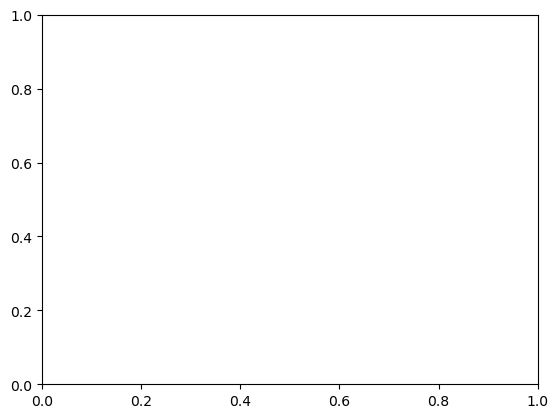

In [22]:
feat=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
plt.boxplot(data[feat].T,labels=feat,vert=False)
plt.show()

In [ ]:
data[feat]=MinMaxScaler().fit_transform(data[feat])

In [ ]:
plt.boxplot(data[feat].T,labels=feat,vert=False)
plt.show()

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Keeping outliers as we don't want to miss some valueble information.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>New Data</h3></li></ul>
</div>

In [26]:
data.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2
0,3,12669,9656,7561,214,2674,1338,False,True
1,3,7057,9810,9568,1762,3293,1776,False,True
2,3,6353,8808,7684,2405,3516,7844,False,True
3,3,13265,1196,4221,6404,507,1788,True,False
4,3,22615,5410,7198,3915,1777,5185,False,True


<div style="background-color:##EDF9FF">
  <ul><li><h3>Selecting Features</h3></li></ul>
</div>

In [28]:
X=data.drop(['Region'],axis=1)
y=data.Region

# K-Fold Cross Validator

Following parameter are avaliable in <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold'>K-Fold Cross Validator</a>:

- __n_splits__:`int`Number of folds by default 5 and minimum value should be 2.

In [32]:
kf=KFold(n_splits=10)
kf.get_n_splits(X,y)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [36]:
clf=DecisionTreeClassifier()
acc=[]
for train_ind, test_ind in kf.split(X,y):
    clf.fit(X.iloc[train_ind,:],y[train_ind])
    pred=clf.predict(X.iloc[test_ind,:])
    acc.append(round(accuracy_score(y[test_ind],pred),3))
    print(round(accuracy_score(y[test_ind],pred),3))
    

0.727
0.477
0.591
0.727
0.409
0.045
0.5
0.205
0.818
0.659


In [38]:
print((sum(acc)*100)/10)

51.58


# Cross Validator

Following parameter are avaliable in <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html'>Cross Validator</a>:

- __estimator__:`model` The model to use to fit the data.
- __X__: array-like
- __y__:target variable `optional`
- __cv__:`int`If __None__ then uses 5-fold CV, on using an `int` value uses stratified KFold(Preserves percentage of samples of each class)


In [41]:
cv =cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')

In [43]:
print(cv)

[0.59090909 0.61363636 0.52272727 0.65909091 0.59090909 0.5
 0.45454545 0.52272727 0.56818182 0.45454545]


In [45]:
cv.mean()

0.5477272727272727

*__Conclusion__*: In this demonstration, we have applied K-Fold cross validation to evaluate our model.